# Dataset Exploration

First, we will show you how to explore the dataset, how to pre-process it and how to start making initial visualizations.

## Library Imports

In [1]:
%reset -f
# Import Os to get to the root directory
import os
import sys

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

# Import own functions
from libraries import corpus
from libraries import pdf2text

# Import other libraries
import nltk 
import numpy as np

import re

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [62]:
from importlib import reload
reload(corpus)

<module 'libraries.corpus' from 'D:\\Dropbox\\Masters\\BIPM\\2 Semester\\Text, Web and Social Media Analytics\\Project\\datascience_project\\libraries\\corpus.py'>

## Data Preprocessing

In [60]:
stats = corpus.get_datastats()

In [61]:
stats.head()

,rank,name,marketcapUSD,priceUSD,volumeUSD,circulatingsupply,changePER,coin
0,1,bitcoin,1.454306e+11,8190.930000,1.953846e+10,1.775508e+07,4.52%,BTC
1,2,ethereum,2.751643e+10,258.460000,8.437298e+09,1.064610e+08,6.79%,ETH
2,3,xrp,1.701080e+10,0.402728,1.235396e+09,4.223895e+10,3.04%,XRP
3,4,litecoin,8.814551e+09,141.730000,6.057901e+09,6.219208e+07,8.47%,LTC
4,5,bitcoincash,7.075264e+09,396.730000,1.439348e+09,1.783416e+07,2.78%,BCH


In [63]:
# Get the Dataset from the White-Paper folders, converting all PDFs into text
dataset = pdf2text.get_dataset()

In [64]:
# Name of all the White Papers in our dataset
dataset.keys()

dict_keys(['0chain', '0x', '1world', '1x2coin', 'ab-chain', 'abcccoin', 'able', 'absolute', 'ace', 'achain', 'acrecoin', 'actinium', 'acuteangle', 'adamant', 'adbank', 'adchainregistry', 'adcoin', 'adhive', 'aditus', 'adshares', 'alluva', 'ample!', 'ardor', 'ark', 'basicattentiontoken', 'binancecoin', 'bitcoin', 'bitcoindiamond', 'bitcoingold', 'bitshares', 'bitstash', 'bittorrent', 'budbo', 'bytecoin', 'bytom', 'chainlink', 'cosmos', 'crypto', 'cryptonex', 'cryptonote', 'daistablecoinsystem', 'dash', 'decentraland', 'dent', 'digixdao', 'dogecoin', 'enjincoin', 'eos', 'etherace', 'ethereum', 'ethereumclassic', 'giant', 'givecoin', 'golem', 'guaranteedentrancetoken', 'gxchain', 'holo', 'horizen', 'hypercash', 'icon', 'iota', 'komodo', 'kwattcoin', 'latoken', 'loopring', 'maidsafecoin', 'maker', 'metaverseetp', 'mixin', 'monerov', 'nano', 'nebulas', 'nem', 'neox', 'oceanprotocol', 'omisego', 'ontology', 'opbusiness', 'opmarket', 'oxcert', 'paxosstandardtoken', 'pundix', 'ravencoin', 'sdu

In [65]:
# Number of White Papers in our dataset
len(dataset.keys())

106

In [54]:
# Example on how to examine a unprocessed White Paper
dataset["latoken"]

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n   \n \n\n \n\nSeptember 2017 \n\nLAToken.com \n\n \n\n\n\n   \n \n\n \n\n\n\n   \n \n\n \n\n\n\n   \n \n\n \n\n\n\n   \n \n\n \n\n\n\n   \n \n\n \n\n                                                           \n\n \n\n\n\n   \n \n\n \n\n                                                           \n\n \n\n\n\n   \n \n\n \n\n\n\n   \n \n\n \n\n\n\n   \n \n\n \n\nO\n\n                                                           \n\n\n\n   \n \n\n \n\n\n\n   \n \n\n \n\n \n\n \n\n \n\n\n\n   \n \n\n \n\n \n\n \n\n \n\n \n\n\n\n   \n \n\n \n\n\n\n   \n \n\n \n\n\n\n   \n \n\n \n\n \n\n\n\n   \n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n\n\n   \n \n\n \n\n                                                           \n\n \n\n\n\n   \n \n\n \n\n                                                           \n\n \n\n\n\n   \n \n\n \n\n                                                           \n\n \n\n\n\n   \n \n\n 

In [66]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = False
# Creates a dictionary with each White Paper and its text pre-processed
corpora = corpus.makeCleanCorpus(dataset, lemmatize=False, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=False)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...


Cleaning: 0chain


[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: 0x
Cleaning: 1world
Cleaning: 1x2coin
Cleaning: ab-chain
Cleaning: abcccoin
Cleaning: able
Cleaning: absolute
Cleaning: ace
Cleaning: achain
Cleaning: acrecoin
Cleaning: actinium
Cleaning: acuteangle
Cleaning: adamant
Cleaning: adbank
Cleaning: adchainregistry
Cleaning: adcoin
Cleaning: adhive
Cleaning: aditus
Cleaning: adshares
Cleaning: alluva
Cleaning: ample!
Cleaning: ardor
Cleaning: ark
Cleaning: basicattentiontoken
Cleaning: binancecoin
Cleaning: bitcoin
Cleaning: bitcoindiamond
Cleaning: bitcoingold
Cleaning: bitshares
Cleaning: bitstash
Cleaning: bittorrent
Cleaning: budbo
Cleaning: bytecoin
Cleaning: bytom
Cleaning: chainlink
Cleaning: cosmos
Cleaning: crypto
Cleaning: cryptonex
Cleaning: cryptonote
Cleaning: daistablecoinsystem
Cleaning: dash
Cleaning: decentraland
Cleaning: dent
Cleaning: digixdao
Cleaning: dogecoin
Cleaning: enjincoin
Cleaning: eos
Cleaning: etherace
Cleaning: ethereum
Cleaning: ethereumclassic
Cleaning: giant
Cleaning: givecoin
Cleaning: golem
Cl

In [67]:
# All the White Papers pre-processed
corpora.keys()

dict_keys(['0chain', '0x', '1world', '1x2coin', 'ab-chain', 'abcccoin', 'able', 'absolute', 'ace', 'achain', 'acrecoin', 'actinium', 'acuteangle', 'adamant', 'adbank', 'adchainregistry', 'adcoin', 'adhive', 'aditus', 'adshares', 'alluva', 'ample!', 'ardor', 'ark', 'basicattentiontoken', 'binancecoin', 'bitcoin', 'bitcoindiamond', 'bitcoingold', 'bitshares', 'bitstash', 'bittorrent', 'budbo', 'bytecoin', 'bytom', 'chainlink', 'cosmos', 'crypto', 'cryptonex', 'cryptonote', 'daistablecoinsystem', 'dash', 'decentraland', 'dent', 'digixdao', 'dogecoin', 'enjincoin', 'eos', 'etherace', 'ethereum', 'ethereumclassic', 'giant', 'givecoin', 'golem', 'guaranteedentrancetoken', 'gxchain', 'holo', 'horizen', 'hypercash', 'icon', 'iota', 'komodo', 'kwattcoin', 'latoken', 'loopring', 'maidsafecoin', 'maker', 'metaverseetp', 'mixin', 'monerov', 'nano', 'nebulas', 'nem', 'neox', 'oceanprotocol', 'omisego', 'ontology', 'opbusiness', 'opmarket', 'oxcert', 'paxosstandardtoken', 'pundix', 'ravencoin', 'sdu

In [68]:
# Function that converts a dictionary into a Pandas Dataframe
# The indexes are the name of the files
df = corpus.dictionaryToPandas(corpora)

In [69]:
# Define to show all the data
pd.set_option('display.max_colwidth', 100)
# Inspect the DataFrame
df.head()

,text
0chain,chain chain fast secure scalable free blockchain tailored highperformance zerotrust decentralize...
0x,open protocol decentralized exchange ethereum blockchain warren amir bandeali xprojectcom februa...
1world,legal disclaimer purpose white paper present world online token potential token holders connecti...
1x2coin,powerpoint presentation table contents introduction masternodes coinholders proofofstake coin sp...
ab-chain,abchain blockchain effect ive advert ing drive traffic ico companies cryptocurrency budgets tabl...


In [70]:
# Merge the WhitePaper Text with the Stats
df = df.merge(stats, how='left',left_index=True, right_on='name')

In [88]:
# WhitePapers not in the ranking
len(df[pd.isnull(df['rank'])])

40

In [20]:
# Explore a White Paper text within a DataFrame (corpus or sentences)
df.loc["bitcoin"][0]

'bitcoin electronic cash system satoshi nakamoto satoshingmxcom abstract purely peertopeer version electronic cash would allow online payment sent directly party another without go financial institution signature provide part solution main benefit lose trust third party still require prevent doublespending propose solution doublespending problem use peertopeer nerk nerk timestamps transaction hash ongoing chain hashbased proofofwork form record change without redo proofofwork long chain serf proof sequence event witness proof come large pool power long majority power control node cooperate attack nerk theyll generate long chain outpace attacker nerk require minimal structure message broadcast best effort basis node leave rejoin nerk accept long proofofwork chain proof happen commerce internet come rely almost exclusively financial institution serve trust third party process electronic payment system work well enough transaction still suffers inherent weakness trust base model completel

## Data Exploration

In [16]:
# Start tokenizing your dataset
tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)

if makeSentences:
    #############################################
    # Tokenization on sentences
    tokens = [tokenizer.tokenize(s) for s in corpora["0chain"]]
    # Flatten the list
    tokens = np.reshape(np.concatenate(tokens), -1)
    #############################################
else:
    #############################################
    # Tokenization on whole corpus (no sentences)
    tokens = tokenizer.tokenize(corpora["0chain"])
    #############################################



print('We have', len(tokens), 'words in total. \n')
print(tokens[5:10])


We have 3585 words in total. 

['free', 'tailor', 'highperformance', 'zerotrust', 'decentralize']


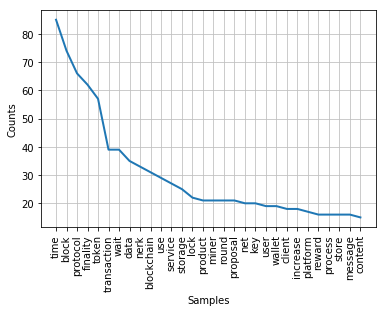

In [18]:
from nltk.probability import FreqDist

# Turn corpus into np before unnest the list
 # numpy can handle text as well

fdist = FreqDist(tokens)

fdist.most_common(5)

import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

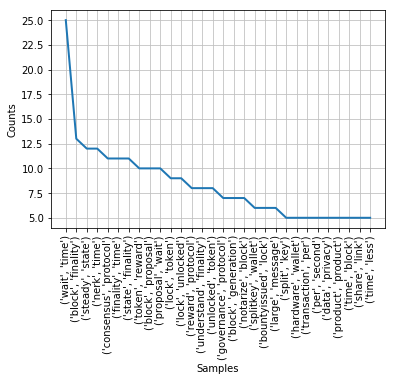

In [19]:
from nltk import bigrams, ngrams
bigrams_tokens = bigrams(tokens)
fdist_bigrams = FreqDist(list(bigrams_tokens))
fdist_bigrams.plot(30,cumulative=False)
plt.show()